In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import ADASYN

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from scipy.sparse import csr_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from keras.models import Sequential
from keras.layers import Dense
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.linear_model import LogisticRegression
from sklearn.cross_decomposition import PLSRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the singlecell_classification data
data_path = '/content/drive/MyDrive/fulldata.csv'
# Read the CSV data
df = pd.read_csv(data_path)


In [ ]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
df_final = df

In [ ]:
# feature selection by identifying top 1000 highly variable genes for each group

# Separate numerical and non-numerical columns
df_numeric = df_final.select_dtypes(include=np.number)
df_non_numeric = df_final.select_dtypes(exclude=np.number)


# Compute mean and variance for each gene
mean_expression = df_numeric.mean()
variance_expression = df_numeric.var()

# Compute the variance-to-mean ratio (VMR)
vmr = variance_expression / mean_expression
# Calculate the max VMR
max_vmr = vmr.max()

# Calculate the min VMR
min_vmr = vmr.min()

print("Max VMR:", max_vmr)
print("Min VMR:", min_vmr)




Max VMR: 3.84827255587954
Min VMR: 0.08548259767673895


In [ ]:

# Categorize genes into groups based on mean expression
bins = bins = [0,0.1,1,6]
groups = pd.cut(mean_expression, bins=bins)

# Create a DataFrame with VMR and groups
vmr_df = pd.DataFrame({'vmr': vmr, 'group': groups})
display(vmr_df)

,vmr,group
RP11-34P13.7,0.710797,"(0.0, 0.1]"
RP11-34P13.8,0.568170,"(0.0, 0.1]"
FO538757.2,0.905190,"(0.0, 0.1]"
AP006222.2,0.755794,"(0.0, 0.1]"
RP4-669L17.10,0.709255,"(0.0, 0.1]"
...,...,...
AL354822.1,0.642319,"(0.0, 0.1]"
AC023491.2,0.304000,"(0.0, 0.1]"
AC004556.1,0.561487,"(0.0, 0.1]"
AC240274.1,0.781994,"(0.0, 0.1]"


In [ ]:
# Count the number of occurrences of each unique value in the 'feature_group' column
counts = vmr_df['group'].value_counts()

print(counts)


(0.0, 0.1]    18864
(0.1, 1.0]     4819
(1.0, 6.0]      308
Name: group, dtype: int64


In [ ]:
df_final['is_Epithelial_cells'] = df_final['CellType'].apply(lambda x: 1 if x == 'Epithelial cells' else 0)
counts = df_final['is_Epithelial_cells'].value_counts()



In [ ]:
from imblearn.over_sampling import ADASYN
from sklearn.datasets import make_classification
from collections import Counter
# Split the data into training and test sets
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
    X = df_final.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
    y = df_final['is_Epithelial_cells']

    # Initialize the ADASYN sampler
    adasyn = ADASYN(random_state=42)

    # Fit and resample the data
    X_res, y_res = adasyn.fit_resample(X, y)

    # Split the data into training and test sets

In [ ]:
X_res

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25065,0.0,0.0,0.263815,0.471099,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.263815,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25066,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25067,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25068,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import pandas as pd

rf_acc_list = []
num_high_list = []
num_feature_list = []

for i in [1,3,5,10,30,50,70,100,500,1000,5000,10000,15000]:
    print(i)
    num_high_list.append(i)
    # For each group, select the top i genes with the highest VMR
    selected_genes = vmr_df.groupby('group')['vmr'].nlargest(i)

    # Filter the original DataFrame to keep only the selected genes
    selected_genes_indices = selected_genes.index.get_level_values(1)
    selected_genes_df = df_numeric[selected_genes_indices]
    print(len(selected_genes_indices))
    num_feature_list.append(len(selected_genes_indices))
    print(selected_genes_indices)

    X = X_res[selected_genes_indices]
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42)

    # RandomForest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('RandomForest Accuracy:', accuracy_score(y_test, y_pred))
    rf_acc_list.append(accuracy_score(y_test, y_pred))
    class_labels = np.unique(np.concatenate((y_test, y_pred)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test, y_pred, target_names=class_labels_str)
    print(report)


1
3
Index(['IL5', 'TPSB2', 'MSMB'], dtype='object')
RandomForest Accuracy: 0.6324291982449143
              precision    recall  f1-score   support

           0       0.72      0.45      0.56      2554
           1       0.59      0.82      0.69      2460

    accuracy                           0.63      5014
   macro avg       0.66      0.64      0.62      5014
weighted avg       0.66      0.63      0.62      5014

3
9
Index(['IL5', 'CSRP3', 'ACTC1', 'TPSB2', 'CST1', 'TPSAB1', 'MSMB', 'SPON2',
       'TFF3'],
      dtype='object')
RandomForest Accuracy: 0.7792181890706024
              precision    recall  f1-score   support

           0       0.77      0.80      0.79      2554
           1       0.79      0.75      0.77      2460

    accuracy                           0.78      5014
   macro avg       0.78      0.78      0.78      5014
weighted avg       0.78      0.78      0.78      5014

5
15
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'TPSB2', 'CST1', 'TPSAB1',
       'RGS5

In [ ]:
    X = df_final.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
    y = df_final['is_Epithelial_cells']

    # Initialize the ADASYN sampler
    adasyn = ADASYN(random_state=42)

    # Fit and resample the data
    X_res, y_res = adasyn.fit_resample(X, y)

    # Split the data into training and test sets

In [ ]:
X_res

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25065,0.0,0.0,0.263815,0.471099,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.263815,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25066,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25067,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25068,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import pandas as pd

xgboost_acc_list = []
num_high_list = []
num_feature_list = []

for i in [1,3,5,10,30,50,70,100,500,1000,5000,10000,15000]:
    print(i)
    num_high_list.append(i)
    # For each group, select the top i genes with the highest VMR
    selected_genes = vmr_df.groupby('group')['vmr'].nlargest(i)

    # Filter the original DataFrame to keep only the selected genes
    selected_genes_indices = selected_genes.index.get_level_values(1)
    selected_genes_df = df_numeric[selected_genes_indices]
    print(len(selected_genes_indices))
    num_feature_list.append(len(selected_genes_indices))
    print(selected_genes_indices)

    X = X_res[selected_genes_indices]
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42)


    # XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
    xgboost_acc_list.append(accuracy_score(y_test, y_pred))
    class_labels = np.unique(np.concatenate((y_test, y_pred)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test, y_pred, target_names=class_labels_str)
    print(report)


1
3
Index(['IL5', 'TPSB2', 'MSMB'], dtype='object')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.6236537694455525
              precision    recall  f1-score   support

           0       0.69      0.47      0.56      2554
           1       0.59      0.78      0.67      2460

    accuracy                           0.62      5014
   macro avg       0.64      0.63      0.62      5014
weighted avg       0.64      0.62      0.61      5014

3
9
Index(['IL5', 'CSRP3', 'ACTC1', 'TPSB2', 'CST1', 'TPSAB1', 'MSMB', 'SPON2',
       'TFF3'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.7842042281611488
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2554
           1       0.79      0.77      0.78      2460

    accuracy                           0.78      5014
   macro avg       0.78      0.78      0.78      5014
weighted avg       0.78      0.78      0.78      5014

5
15
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'TPSB2', 'CST1', 'TPSAB1',
       'RGS5', 'IGFBP7', 'MSMB', 'SPON2', 'TFF3', 'MT2A', 'FOSB'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8195053849222178
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      2554
           1       0.80      0.85      0.82      2460

    accuracy                           0.82      5014
   macro avg       0.82      0.82      0.82      5014
weighted avg       0.82      0.82      0.82      5014

10
30
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC', 'TPSB2', 'CST1', 'TPSAB1', 'RGS5', 'IGFBP7', 'CPA3',
       'CD69', 'CCL4', 'CCL3', 'SPARCL1', 'MSMB', 'SPON2', 'TFF3', 'MT2A',
       'FOSB', 'PCA3', 'ZFP36', 'RPS4Y1', 'EGR1', 'NFKBIA'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8500199441563622
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      2554
           1       0.82      0.88      0.85      2460

    accuracy                           0.85      5014
   macro avg       0.85      0.85      0.85      5014
weighted avg       0.85      0.85      0.85      5014

30
90
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC', 'GNLY', 'RP11-21B23.2', 'IGKV1-12', 'MYL1', 'UCMA',
       'CCL19', 'AGXT', 'NTS', 'NKG7', 'GRP', 'WISP3', 'AC012370.3', 'SFRP2',
       'IGHD', 'IGLC3', 'MFAP5', 'GZMB', 'MYH1', 'CCL5', 'CCL3L3', 'TPSB2',
       'CST1', 'TPSAB1', 'RGS5', 'IGFBP7', 'CPA3', 'CD69', 'CCL4', 'CCL3',
       'SPARCL1', 'APOC1', 'ACTA2', 'CD74', 'IFI27', 'APOE', 'RGS1', 'TYROBP',
       'MGP', 'SPARC', 'NPY', 'RGCC', 'TAGLN', 'PLA2G2A', 'HLA-DRA',
       'NDUFA4L2', 'FCER1G', 'S100A4', 'CD52', 'SRGN', 'HIGD1B', 'MSMB',
       'SPON2', 'TFF3', 'MT2

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.860191463901077
              precision    recall  f1-score   support

           0       0.89      0.83      0.86      2554
           1       0.84      0.89      0.86      2460

    accuracy                           0.86      5014
   macro avg       0.86      0.86      0.86      5014
weighted avg       0.86      0.86      0.86      5014

50
150
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPL17', 'SOX4', 'HERPUD1', 'SORD', 'KRT18', 'TRPM4', 'DCXR', 'TMPRSS2',
       'BTG1', 'H2AFJ'],
      dtype='object', length=150)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8703629836457918
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2554
           1       0.85      0.90      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014

70
210
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'PRDX2', 'TSTD1', 'DBI', 'JUN', 'MZT2B', 'P4HB', 'RPS27L', 'MYL12B',
       'NCL', 'SAT1'],
      dtype='object', length=210)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8633825289190267
              precision    recall  f1-score   support

           0       0.89      0.84      0.86      2554
           1       0.84      0.89      0.86      2460

    accuracy                           0.86      5014
   macro avg       0.86      0.86      0.86      5014
weighted avg       0.86      0.86      0.86      5014

100
300
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'ATP5G3', 'HMGN2', 'MIF', 'MPC2', 'CST3', 'ATP5J2', 'HMGN1', 'CD9',
       'TOMM20', 'CALR'],
      dtype='object', length=300)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8749501396090945
              precision    recall  f1-score   support

           0       0.90      0.85      0.87      2554
           1       0.85      0.90      0.88      2460

    accuracy                           0.87      5014
   macro avg       0.88      0.88      0.87      5014
weighted avg       0.88      0.87      0.87      5014

500
1308
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=1308)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8733546071001197
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2554
           1       0.85      0.91      0.88      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.88      0.87      0.87      5014

1000
2308
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=2308)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8787395293179099
              precision    recall  f1-score   support

           0       0.91      0.85      0.88      2554
           1       0.85      0.91      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014

5000
10126
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=10126)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8737534902273634
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2554
           1       0.84      0.91      0.88      2460

    accuracy                           0.87      5014
   macro avg       0.88      0.87      0.87      5014
weighted avg       0.88      0.87      0.87      5014

10000
15126
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=15126)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8767451136816913
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014

15000
20126
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=20126)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8751495811727164
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.87      5014



In [ ]:
xgboost_acc_list.reverse()

[0.6236537694455525,
 0.7842042281611488,
 0.8195053849222178,
 0.8500199441563622,
 0.860191463901077,
 0.8703629836457918,
 0.8633825289190267,
 0.8749501396090945,
 0.8733546071001197,
 0.8787395293179099,
 0.8737534902273634,
 0.8767451136816913,
 0.8751495811727164]

In [ ]:
str_num_feature_list_reversed = ['all features', '20126', '15126', '10126', '2308', '1308', '300', '210', '150', '90', '30', '15', '9', '3']
str_num_high_list_reversed = ['all features', '15000', '10000', '5000', '1000', '500', '100', '70', '50', '30', '10', '5', '3', '1']

In [ ]:
xgboost_acc_list.append('0.8765')
xgboost_acc_list

In [ ]:
xgboost_acc_list[-1] = 0.8765


In [ ]:
xgboost_acc_list.reverse()

In [ ]:
rf_acc_list.append(0.8700)

In [ ]:
rf_acc_list.reverse()

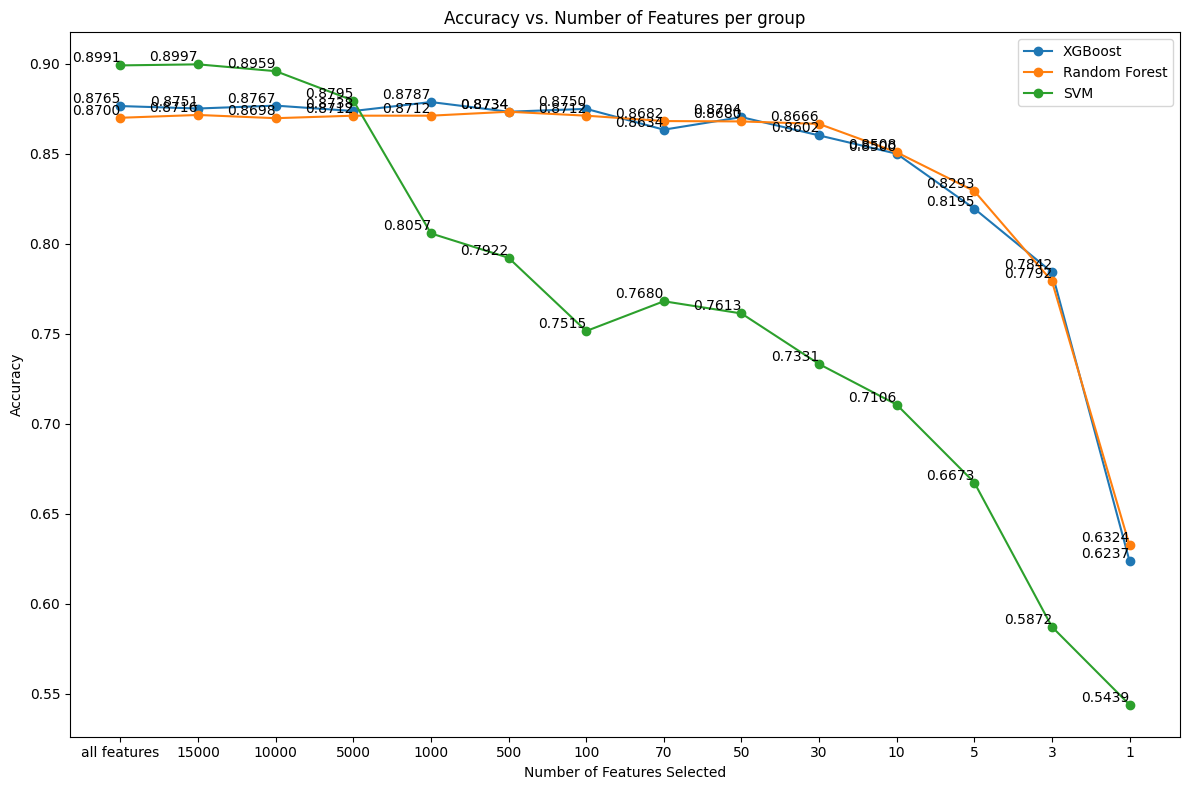

In [ ]:

plt.figure(figsize=(12, 8))
plt.plot(str_num_high_list_reversed, xgboost_acc_list,label = 'XGBoost',marker='o', linestyle='-')
plt.plot(str_num_high_list_reversed, rf_acc_list, label='Random Forest', marker='o', linestyle='-')
plt.plot(str_num_high_list_reversed, acc_list_SVM, label='SVM', marker='o', linestyle='-')


for i, txt in enumerate(xgboost_acc_list):
    plt.text(str_num_high_list_reversed[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

for i, txt in enumerate(rf_acc_list):
    plt.text(str_num_high_list_reversed[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately
for i, txt in enumerate(acc_list_SVM):
    plt.text(str_num_high_list_reversed[i], txt, f"{txt:.4f}", ha='right', va='bottom')  # You can adjust 'ha' and 'va' to position the text appropriately

plt.xlabel('Number of Features Selected')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Features per group')
plt.legend()
plt.tight_layout()
plt.savefig("compare_feature_cell.png")
plt.show()



In [ ]:
print(xgboost_acc_list)
print(rf_acc_list)
print(acc_list_SVM)



[0.8765, 0.8751495811727164, 0.8767451136816913, 0.8737534902273634, 0.8787395293179099, 0.8733546071001197, 0.8749501396090945, 0.8633825289190267, 0.8703629836457918, 0.860191463901077, 0.8500199441563622, 0.8195053849222178, 0.7842042281611488, 0.6236537694455525]
[0.87, 0.8715596330275229, 0.8697646589549262, 0.8711607499002793, 0.8711607499002793, 0.8733546071001197, 0.8711607499002793, 0.8681691264459513, 0.8679696848823295, 0.8665735939369764, 0.8508177104108496, 0.8292780215396889, 0.7792181890706024, 0.6324291982449143]
[0.8991, 0.899680893498205, 0.8958915037893898, 0.8795372955723972, 0.8057439170323095, 0.7921818907060232, 0.751495811727164, 0.7680494615077782, 0.761268448344635, 0.7331471878739529, 0.7106102911846829, 0.6673314718787395, 0.5871559633027523, 0.543877143996809]


In [7]:

num_feature_list =  ['all features', '15000', '10000', '5000', '1000', '500', '100', '70', '50', '30', '10', '5', '3', '1']
xgboost_acc_list = [0.8765, 0.8751495811727164, 0.8767451136816913, 0.8737534902273634, 0.8787395293179099, 0.8733546071001197, 0.8749501396090945, 0.8633825289190267, 0.8703629836457918, 0.860191463901077, 0.8500199441563622, 0.8195053849222178, 0.7842042281611488, 0.6236537694455525]
rf_acc_list= [0.87, 0.8715596330275229, 0.8697646589549262, 0.8711607499002793, 0.8711607499002793, 0.8733546071001197, 0.8711607499002793, 0.8681691264459513, 0.8679696848823295, 0.8665735939369764, 0.8508177104108496, 0.8292780215396889, 0.7792181890706024, 0.6324291982449143]
acc_list_SVM = [0.8991, 0.899680893498205, 0.8958915037893898, 0.8795372955723972, 0.8057439170323095, 0.7921818907060232, 0.771495811727164, 0.7680494615077782, 0.761268448344635, 0.7331471878739529, 0.7106102911846829, 0.6673314718787395, 0.5871559633027523, 0.543877143996809]

In [8]:
num_feature_list.reverse()
xgboost_acc_list.reverse()
rf_acc_list.reverse()
acc_list_SVM.reverse()

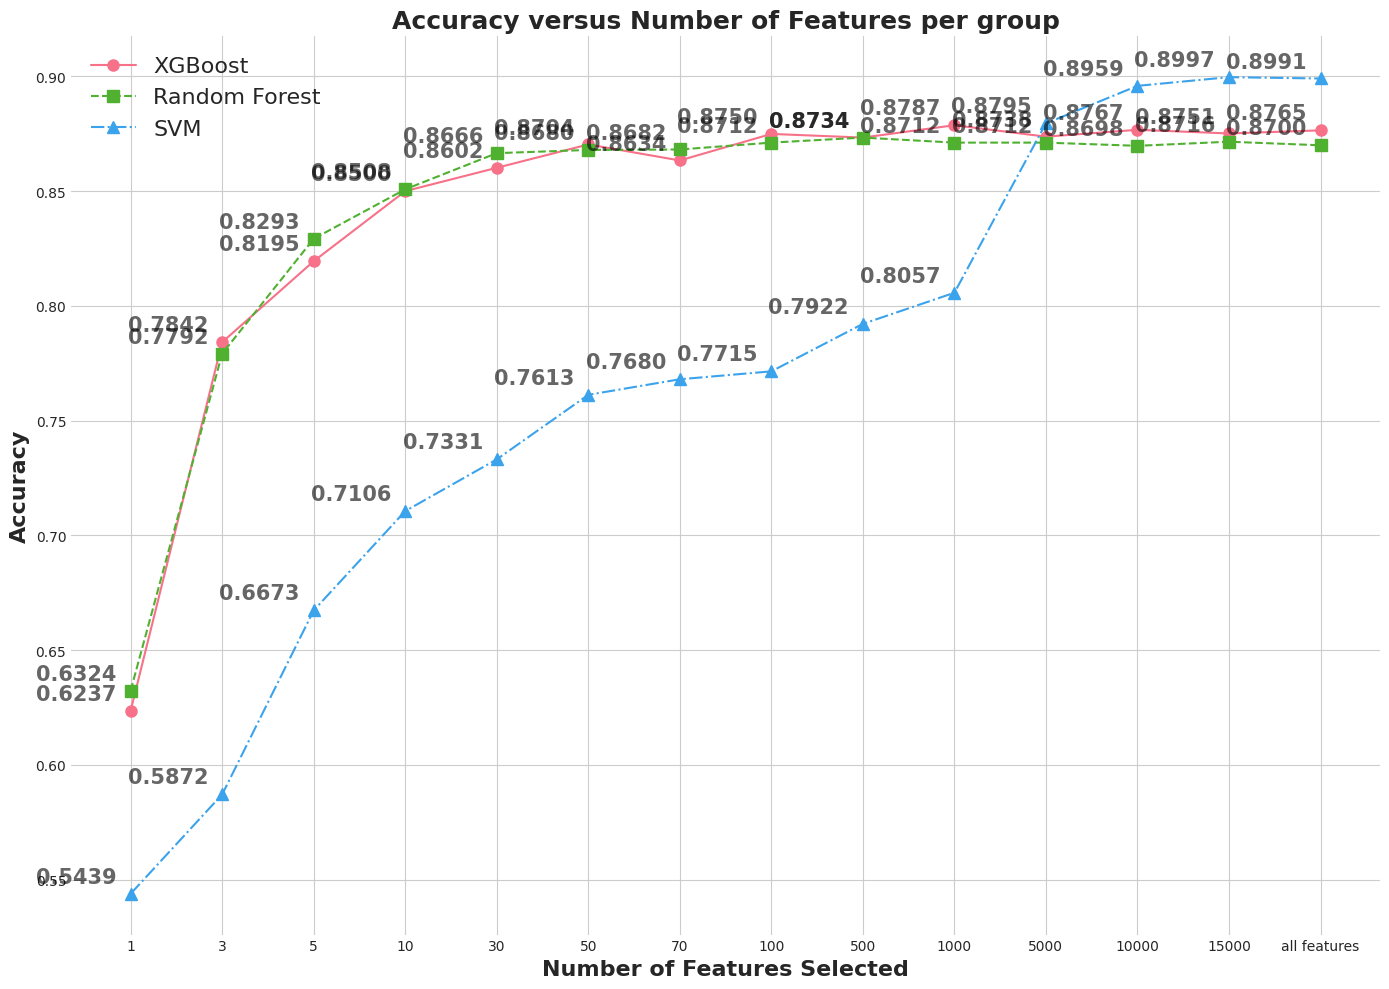

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("husl", 3)

# Initialize the figure
plt.figure(figsize=(14, 10))

# Plot each dataset
plt.plot(num_feature_list, xgboost_acc_list, label='XGBoost', marker='o', linestyle='-', color=palette[0], markersize=8)
plt.plot(num_feature_list, rf_acc_list, label='Random Forest', marker='s', linestyle='--', color=palette[1], markersize=8)
plt.plot(num_feature_list, acc_list_SVM, label='SVM', marker='^', linestyle='-.', color=palette[2], markersize=8)

# Function to annotate points with labels
def annotate_points(x, y, txt_list, ha='right', va='bottom', offset=(-10,5)):
    for i, txt in enumerate(txt_list):
        plt.annotate(f"{txt:.4f}", (x[i], y[i]), textcoords="offset points", xytext=offset, ha=ha, va=va, fontsize=15, color='black', alpha=0.6,fontweight='bold')

annotate_points(num_feature_list, xgboost_acc_list, xgboost_acc_list)
annotate_points(num_feature_list, rf_acc_list, rf_acc_list)
annotate_points(num_feature_list, acc_list_SVM, acc_list_SVM)

# Enhancing x and y axis
plt.xlabel('Number of Features Selected', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.title('Accuracy versus Number of Features per group', fontsize=18, fontweight='bold')

# Enhancing legend
plt.legend(fontsize=16, loc='best')

# Tight layout
plt.tight_layout()

# Save with better dpi
plt.savefig("compare_feature_cell.png", dpi=300)

# Show the plot
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

X = df_final.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
y = df_final['is_Epithelial_cells']

# Initialize the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X, y)

# Split the data into training and test sets
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Assuming you've split the data into X_train, X_test, y_train, y_test

# Note: Make sure to import LinearSVC from sklearn.svm
from sklearn.svm import LinearSVC

model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))

# Now get the unique class labels and convert them to strings
class_labels = y.unique().astype(str)

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)
print(report)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8990825688073395
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2554
           1       0.97      0.82      0.89      2460

    accuracy                           0.90      5014
   macro avg       0.91      0.90      0.90      5014
weighted avg       0.91      0.90      0.90      5014



[[2499   55]
 [ 451 2009]]


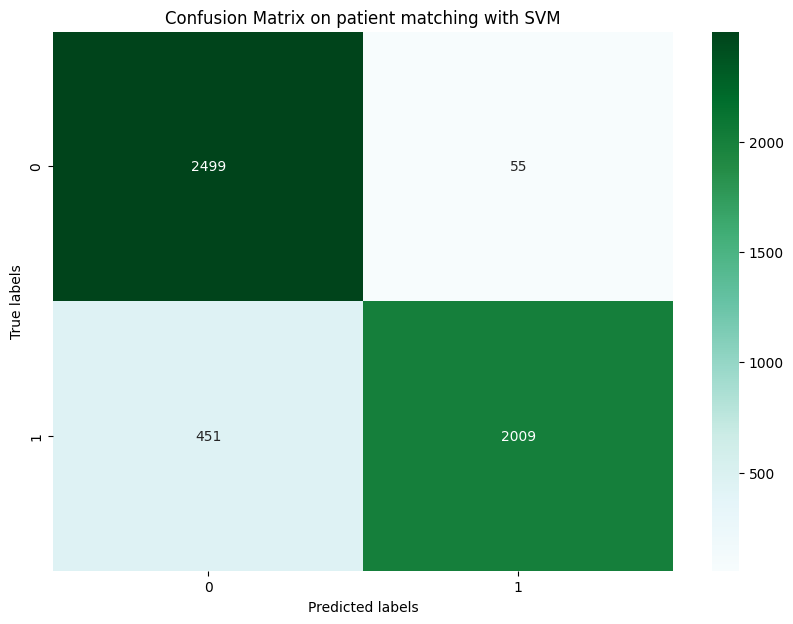

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='BuGn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on patient matching with SVM')
plt.savefig("smv_pm.png")
plt.show()


In [ ]:
acc_list_SVM = []
num_high_list_SVM = []
num_feature_list_SVM = []
for i in [1,3,5,10,30,50,70,100,500,1000,5000,10000,15000]:
  print(i)
  num_high_list_SVM.append(i)
  # For tach group, select the top i genes with the highest VMR
  selected_genes = vmr_df.groupby('group')['vmr'].nlargest(i)
  # Filter the original DataFrame to keep only the selected genes
  selected_genes_indices = selected_genes.index.get_level_values(1)
  selected_genes_df = df_numeric[selected_genes_indices]
  print(len(selected_genes_indices))
  num_feature_list_SVM.append(len(selected_genes_indices))
  print(selected_genes_indices)
  X = X_res[selected_genes_indices]

  # Split the data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42)

  model = LinearSVC(max_iter=1000)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))
  acc_list_SVM.append(accuracy_score(y_test, y_pred))
  # Now get the unique class labels and convert them to strings
  class_labels = y.unique().astype(str)

  # Generate the classification report
  report = classification_report(y_test, y_pred, target_names=class_labels)
  print(report)


1
3
Index(['IL5', 'TPSB2', 'MSMB'], dtype='object')
Linear SVM Accuracy: 0.543877143996809
              precision    recall  f1-score   support

           0       0.54      0.68      0.60      2554
           1       0.55      0.40      0.46      2460

    accuracy                           0.54      5014
   macro avg       0.54      0.54      0.53      5014
weighted avg       0.54      0.54      0.53      5014

3
9
Index(['IL5', 'CSRP3', 'ACTC1', 'TPSB2', 'CST1', 'TPSAB1', 'MSMB', 'SPON2',
       'TFF3'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.5871559633027523
              precision    recall  f1-score   support

           0       0.59      0.65      0.61      2554
           1       0.59      0.53      0.56      2460

    accuracy                           0.59      5014
   macro avg       0.59      0.59      0.59      5014
weighted avg       0.59      0.59      0.59      5014

5
15
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'TPSB2', 'CST1', 'TPSAB1',
       'RGS5', 'IGFBP7', 'MSMB', 'SPON2', 'TFF3', 'MT2A', 'FOSB'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.6673314718787395
              precision    recall  f1-score   support

           0       0.72      0.57      0.64      2554
           1       0.63      0.77      0.69      2460

    accuracy                           0.67      5014
   macro avg       0.68      0.67      0.66      5014
weighted avg       0.68      0.67      0.66      5014

10
30
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC', 'TPSB2', 'CST1', 'TPSAB1', 'RGS5', 'IGFBP7', 'CPA3',
       'CD69', 'CCL4', 'CCL3', 'SPARCL1', 'MSMB', 'SPON2', 'TFF3', 'MT2A',
       'FOSB', 'PCA3', 'ZFP36', 'RPS4Y1', 'EGR1', 'NFKBIA'],
      dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.7106102911846829
              precision    recall  f1-score   support

           0       0.72      0.70      0.71      2554
           1       0.70      0.72      0.71      2460

    accuracy                           0.71      5014
   macro avg       0.71      0.71      0.71      5014
weighted avg       0.71      0.71      0.71      5014

30
90
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC', 'GNLY', 'RP11-21B23.2', 'IGKV1-12', 'MYL1', 'UCMA',
       'CCL19', 'AGXT', 'NTS', 'NKG7', 'GRP', 'WISP3', 'AC012370.3', 'SFRP2',
       'IGHD', 'IGLC3', 'MFAP5', 'GZMB', 'MYH1', 'CCL5', 'CCL3L3', 'TPSB2',
       'CST1', 'TPSAB1', 'RGS5', 'IGFBP7', 'CPA3', 'CD69', 'CCL4', 'CCL3',
       'SPARCL1', 'APOC1', 'ACTA2', 'CD74', 'IFI27', 'APOE', 'RGS1', 'TYROBP',
       'MGP', 'SPARC', 'NPY', 'RGCC', 'TAGLN', 'PLA2G2A', 'HLA-DRA',
       'NDUFA4L2', 'FCER1G', 'S100A4', 'CD52', 'SRGN', 'HIGD1B', 'MSMB',
       'SPON2', 'TFF3', '

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.7331471878739529
              precision    recall  f1-score   support

           0       0.76      0.69      0.73      2554
           1       0.71      0.78      0.74      2460

    accuracy                           0.73      5014
   macro avg       0.74      0.73      0.73      5014
weighted avg       0.74      0.73      0.73      5014

50
150
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPL17', 'SOX4', 'HERPUD1', 'SORD', 'KRT18', 'TRPM4', 'DCXR', 'TMPRSS2',
       'BTG1', 'H2AFJ'],
      dtype='object', length=150)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.761268448344635
              precision    recall  f1-score   support

           0       0.74      0.82      0.78      2554
           1       0.79      0.70      0.74      2460

    accuracy                           0.76      5014
   macro avg       0.76      0.76      0.76      5014
weighted avg       0.76      0.76      0.76      5014

70
210
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'PRDX2', 'TSTD1', 'DBI', 'JUN', 'MZT2B', 'P4HB', 'RPS27L', 'MYL12B',
       'NCL', 'SAT1'],
      dtype='object', length=210)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.7680494615077782
              precision    recall  f1-score   support

           0       0.74      0.84      0.79      2554
           1       0.81      0.69      0.75      2460

    accuracy                           0.77      5014
   macro avg       0.77      0.77      0.77      5014
weighted avg       0.77      0.77      0.77      5014

100
300
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'ATP5G3', 'HMGN2', 'MIF', 'MPC2', 'CST3', 'ATP5J2', 'HMGN1', 'CD9',
       'TOMM20', 'CALR'],
      dtype='object', length=300)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.751495811727164
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      2554
           1       0.73      0.78      0.76      2460

    accuracy                           0.75      5014
   macro avg       0.75      0.75      0.75      5014
weighted avg       0.75      0.75      0.75      5014

500
1308
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=1308)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.7921818907060232
              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2554
           1       0.83      0.73      0.77      2460

    accuracy                           0.79      5014
   macro avg       0.80      0.79      0.79      5014
weighted avg       0.80      0.79      0.79      5014

1000
2308
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=2308)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8057439170323095
              precision    recall  f1-score   support

           0       0.78      0.85      0.82      2554
           1       0.83      0.76      0.79      2460

    accuracy                           0.81      5014
   macro avg       0.81      0.80      0.80      5014
weighted avg       0.81      0.81      0.81      5014

5000


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


10126
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=10126)
Linear SVM Accuracy: 0.8795372955723972
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2554
           1       0.96      0.79      0.86      2460

    accuracy                           0.88      5014
   macro avg       0.89      0.88      0.88      5014
weighted avg       0.89      0.88      0.88      5014

10000
15126
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=15126)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8958915037893898
              precision    recall  f1-score   support

           0       0.84      0.98      0.91      2554
           1       0.97      0.81      0.88      2460

    accuracy                           0.90      5014
   macro avg       0.91      0.89      0.89      5014
weighted avg       0.91      0.90      0.90      5014

15000
20126
Index(['IL5', 'CSRP3', 'ACTC1', 'MYH2', 'CCL1', 'IGLC2', 'IGF2-AS', 'TNNI1',
       'CCR9', 'IGKC',
       ...
       'RPS15', 'RPS28', 'RPL3', 'EEF1A1', 'RPL27A', 'RPL34', 'RPL11', 'RPS27',
       'RPLP1', 'RPL10'],
      dtype='object', length=20126)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.899680893498205
              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2554
           1       0.98      0.82      0.89      2460

    accuracy                           0.90      5014
   macro avg       0.91      0.90      0.90      5014
weighted avg       0.91      0.90      0.90      5014



In [ ]:
acc_list_SVM.append(0.8991)

In [ ]:
acc_list_SVM.reverse()

In [ ]:
acc_list_SVM

[0.8991,
 0.899680893498205,
 0.8958915037893898,
 0.8795372955723972,
 0.8057439170323095,
 0.7921818907060232,
 0.751495811727164,
 0.7680494615077782,
 0.761268448344635,
 0.7331471878739529,
 0.7106102911846829,
 0.6673314718787395,
 0.5871559633027523,
 0.543877143996809]

In [ ]:
from sklearn.svm import SVC

# Assume you have your data X_train, y_train loaded
# and a list feature_names with the names of your features

feature_names = X_train.columns.tolist()
# 2. Rank features based on absolute weights
feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# 3. Map numerical indices to actual feature names
ranked_feature_names = [feature_names[i] for i in ranked_features_indices]

# 4. Select top 100 feature names
top_100_feature_names = ranked_feature_names[:100]

print("Top 100 features:", top_100_feature_names)

Top 100 features: ['RPL41', 'RPL17', 'TFF3', 'MSMB', 'PPDPF', 'RPS24', 'KLK11', 'ADIRF', 'KLK12', 'OGN', 'RPS4Y1', 'IGF1', 'MT2A', 'NBEAL1', 'TMBIM4', 'HLA-DRB1', 'ZBTB16', 'IGFBP3', 'RPL39', 'HLA-DRB5', 'SPRY1', 'TMSB4X', 'CPM', 'PLA2G2A', 'C15orf48', 'VIM', 'RPL34', 'RPL13', 'THSD7A', 'HOPX', 'RPS25', 'ITM2B', 'FXYD3', 'FKBP5', 'NPY', 'AGR2', 'IER3', 'B2M', 'SAT1', 'RPS20', 'CST1', 'ENPP2', 'G0S2', 'TPT1', 'LY6E', 'PRSS23', 'MIPEP', 'NUDT4', 'VGLL3', 'SNHG19', 'PRAC1', 'RPL9', 'MALAT1', 'GDF15', 'SMIM22', 'RPSA', 'RPS3', 'CXCL8', 'RPS6', 'SOX4', 'MAP1LC3B', 'EIF5', 'CAMK2N1', 'FABP5', 'ANK3', 'RPL26', 'NDUFS5', 'CPE', 'HES4', 'MZT2B', 'CANX', 'BRI3', 'C11orf96', 'CHMP4B', 'IFI16', 'SNHG25', 'NCL', 'RHOB', 'BRD2', 'ELK4', 'JUNB', 'LDHA', 'ANPEP', 'EIF3H', 'UQCR11', 'SMDT1', 'AMD1', 'MPC2', 'RPL14', 'HINT1', 'ATP1A1', 'NUCB2', 'CCNI', 'RPS21', 'LTBP1', 'MTDH', 'NUDT8', 'BTG2', 'AC090498.1', 'RPL35A']


In [ ]:
# Filter your training data using these indices
X_train_top_100 = X_train[top_100_feature_names]

# Do the same for the test set or any other dataset you want to filter
X_test_top_100 = X_test[top_100_feature_names]
# Using only the top 100 features to train a new SVM model

svm_model_top_100 = LinearSVC(max_iter=10000)
svm_model_top_100.fit(X_train_top_100, y_train)

# If you have a test set:
# Evaluate its performance
accuracy_top_100 = svm_model_top_100.score(X_test_top_100, y_test)
print(f"Accuracy with top 100 features: {accuracy_top_100:.2f}")


Accuracy with top 100 features: 0.98


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# feature importance

In [ ]:
df

,reference,tumourID,CellType,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,...,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1,is_Epithelial_cells
0,CGTCAGGAGCCCAGCT-2,SC162,Macrophages,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0
1,AACGTTGCATCGGACC-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.833,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
2,TTGAACGGTCTCAACA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
3,GGACGTCCAACACCTA-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.547,1
4,TACGGGCCATGCAACT-2,SC162,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.272,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15490,CTCAGAAAGCAAATCA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15491,CAAGAAAAGCCGTCGT-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15492,AGCTTGAAGTGCGTGA-12,SC156,Epithelial cells,0.0,0.0,0.000,0.000,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1
15493,AACTCAGTCTTTAGGG-12,SC156,Epithelial cells,0.0,0.0,0.505,0.505,0.0,0.0,0.0,...,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1


In [ ]:
X = df.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
y = df['is_Epithelial_cells']

# Initialize the ADASYN sampler
adasyn = ADASYN(random_state=42)

# Fit and resample the data
X_res, y_res = adasyn.fit_resample(X, y)



In [ ]:
X_res

,RP11-34P13.7,RP11-34P13.8,FO538757.2,AP006222.2,RP4-669L17.10,RP5-857K21.4,RP5-857K21.2,RP11-206L10.9,FAM87B,LINC00115,...,AC145212.2,AC011043.1,AL592183.1,AC007325.1,AC007325.4,BX072566.1,AL354822.1,AC023491.2,AC004556.1,AC240274.1
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.501,0.0,0.0,...,0.0,0.000,0.833000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.455,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.547
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.272,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25065,0.0,0.0,0.263815,0.471099,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.263815,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25066,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25067,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000
25068,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,...,0.0,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))

class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8765456721180694
              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014



In [ ]:
class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014



In [ ]:
importances = model.feature_importances_
importance_series = pd.Series(importances, index=X.columns)
top_features50 = importance_series.sort_values(ascending=False)[:50].index
print(top_features50)
top_features100 = importance_series.sort_values(ascending=False)[:100].index
print(top_features100)
top_features150 = importance_series.sort_values(ascending=False)[:150].index
print(top_features150)
top_features200 = importance_series.sort_values(ascending=False)[:200].index
print(top_features200)
top_features20 = importance_series.sort_values(ascending=False)[:20].index
print(top_features20)

Index(['SH3BGRL', 'CRK', 'HLA-B', 'CDKN1A', 'UTRN', 'NEDD9', 'GNAQ', 'SASH1',
       'LMF2', 'HLA-A', 'PER1', 'MIR22HG', 'DERL1', 'MBLAC1', 'SEPT7', 'RPL8',
       'SFT2D2', 'RP11-989E6.10', 'TGOLN2', 'WHSC1L1', 'TPGS2', 'UBOX5',
       'RPS2', 'CPE', 'SNHG19', 'GREB1L', 'ADIRF', 'RAB32', 'SIPA1L2',
       'B3GNT2', 'KANSL3', 'IGFBP7', 'XX-C2158C12.2', 'RGCC', 'SEMA3B-AS1',
       'TTC30A', 'CTSO', 'BTBD7', 'CCL20', 'RBP7', 'PEX5', 'CBFA2T3', 'ACOT4',
       'BCAS2', 'ZBTB4', 'TSC22D3', 'MMGT1', 'ST8SIA6-AS1', 'HLTF',
       'CTD-2017F17.1'],
      dtype='object')
Index(['SH3BGRL', 'CRK', 'HLA-B', 'CDKN1A', 'UTRN', 'NEDD9', 'GNAQ', 'SASH1',
       'LMF2', 'HLA-A', 'PER1', 'MIR22HG', 'DERL1', 'MBLAC1', 'SEPT7', 'RPL8',
       'SFT2D2', 'RP11-989E6.10', 'TGOLN2', 'WHSC1L1', 'TPGS2', 'UBOX5',
       'RPS2', 'CPE', 'SNHG19', 'GREB1L', 'ADIRF', 'RAB32', 'SIPA1L2',
       'B3GNT2', 'KANSL3', 'IGFBP7', 'XX-C2158C12.2', 'RGCC', 'SEMA3B-AS1',
       'TTC30A', 'CTSO', 'BTBD7', 'CCL20', 'RBP7', '

In [ ]:
X = df.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
y = df['tumourID']
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform y labels to integer values
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)  # Only transform, don't fit on test set!

# Now use the encoded labels to train your XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
model.fit(X_train, y_train_encoded)
y_pred_encoded = model.predict(X_test)

# Convert the predicted encoded labels back to original labels if required
y_pred = label_encoder.inverse_transform(y_pred_encoded)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
importances_p = model.feature_importances_
importance_series_p = pd.Series(importances_p, index=X.columns)
top_features50p = importance_series_p.sort_values(ascending=False)[:50].index
print(top_features50p)
top_features100p = importance_series_p.sort_values(ascending=False)[:100].index
print(top_features100p)
top_features150p = importance_series_p.sort_values(ascending=False)[:150].index
print(top_features150p)
top_features200p = importance_series_p.sort_values(ascending=False)[:200].index
print(top_features200p)
top_features20p = importance_series_p.sort_values(ascending=False)[:20].index
print(top_features20p)

Index(['OGN', 'CRISP3', 'ADIRF', 'HSD17B6', 'CST1', 'MSMB', 'B2M', 'IGFBP7',
       'SPARCL1', 'SPON2', 'SERPINB11', 'KLK11', 'SMIM22', 'IER3', 'AGR2',
       'RSPO3', 'MMP7', 'HSPE1', 'SLC7A7', 'ANKRD30A', 'CRISPLD1', 'ITGAX',
       'KLK2', 'SCN1A', 'PCA3', 'SLC1A3', 'CPA3', 'RPL23', 'COL6A2', 'SDCBP',
       'FAM96B', 'THSD7A', 'RPS16', 'IFI16', 'ACAD8', 'FGF12', 'PGAM1',
       'ERVH48-1', 'ITM2B', 'TPSB2', 'RDH10', 'OMD', 'HLA-E', 'KRT8', 'KLK3',
       'RPS3A', 'SLC40A1', 'NTS', 'PLEKHB2', 'THYN1'],
      dtype='object')
Index(['OGN', 'CRISP3', 'ADIRF', 'HSD17B6', 'CST1', 'MSMB', 'B2M', 'IGFBP7',
       'SPARCL1', 'SPON2', 'SERPINB11', 'KLK11', 'SMIM22', 'IER3', 'AGR2',
       'RSPO3', 'MMP7', 'HSPE1', 'SLC7A7', 'ANKRD30A', 'CRISPLD1', 'ITGAX',
       'KLK2', 'SCN1A', 'PCA3', 'SLC1A3', 'CPA3', 'RPL23', 'COL6A2', 'SDCBP',
       'FAM96B', 'THSD7A', 'RPS16', 'IFI16', 'ACAD8', 'FGF12', 'PGAM1',
       'ERVH48-1', 'ITM2B', 'TPSB2', 'RDH10', 'OMD', 'HLA-E', 'KRT8', 'KLK3',
       'RPS

In [ ]:
def compare_lists(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    common_items = set1.intersection(set2)
    unique_items = set1.symmetric_difference(set2)

    return len(common_items), len(unique_items),common_items,unique_items

same_count, different_count,common_items,unique_items = compare_lists(top_features50, top_features50p)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)

same_count, different_count,common_items,unique_items = compare_lists(top_features100, top_features100p)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)

same_count, different_count,common_items,unique_items = compare_lists(top_features150, top_features150p)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)

same_count, different_count,common_items,unique_items = compare_lists(top_features200, top_features200p)
print(f"Number of same items: {same_count}")
print(f"Number of different items: {different_count}")
print(common_items)

Number of same items: 2
Number of different items: 96
{'ADIRF', 'IGFBP7'}
Number of same items: 9
Number of different items: 182
{'AGR2', 'ADIRF', 'CST1', 'RPS3A', 'VGLL3', 'IGFBP7', 'OGN', 'NPY', 'MSMB'}
Number of same items: 14
Number of different items: 272
{'AGR2', 'ADIRF', 'CST1', 'BRD4', 'RPS3A', 'PRAC1', 'KRT8', 'VGLL3', 'IGFBP7', 'OGN', 'NPY', 'MZT2B', 'MSMB', 'THSD7A'}
Number of same items: 19
Number of different items: 362
{'CST1', 'HLA-A', 'MSMB', 'AGR2', 'BRD4', 'SNHG19', 'KRT8', 'KLK11', 'KLK3', 'OGN', 'PRAC1', 'HLTF', 'VGLL3', 'IGFBP7', 'THSD7A', 'ADIRF', 'RPS3A', 'NPY', 'MZT2B'}


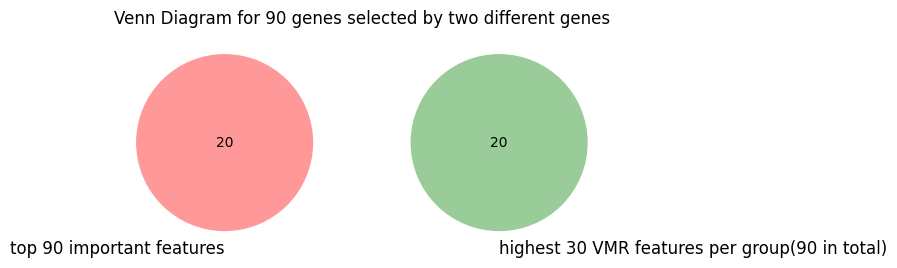

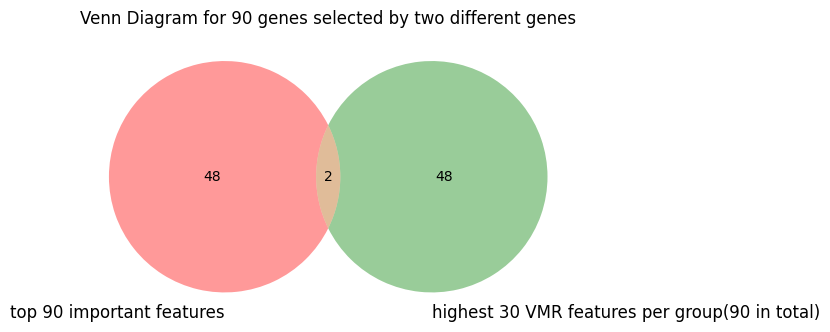

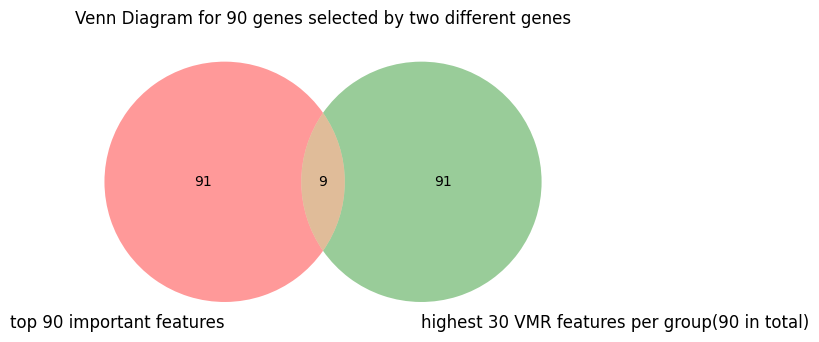

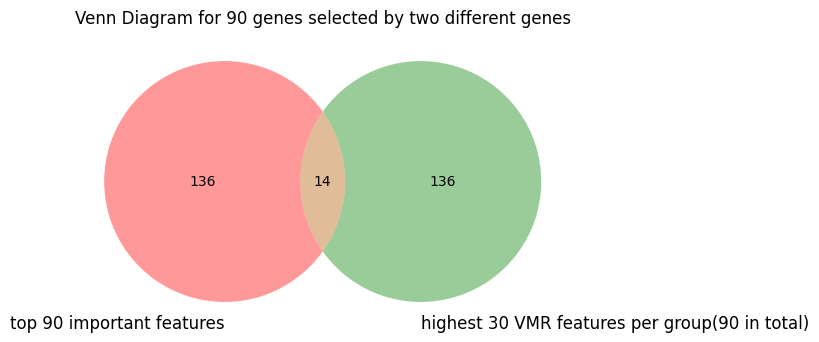

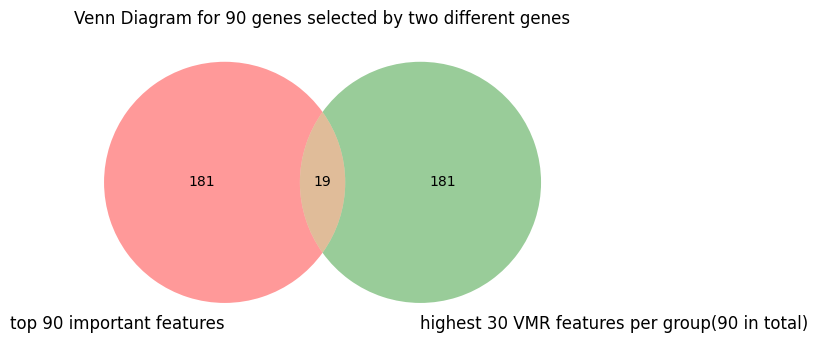

In [ ]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

def plot_venn(list1, list2):
    set1 = set(list1)
    set2 = set(list2)

    # Using the venn2 function to plot a Venn diagram for two sets
    venn2([set1, set2], ('top 90 important features', 'highest 30 VMR features per group(90 in total)'))

    plt.title("Venn Diagram for 90 genes selected by two different genes")
    plt.show()
plot_venn(top_features20,top_features20p)


plot_venn(top_features50,top_features50p)
plot_venn(top_features100,top_features100p)

plot_venn(top_features150,top_features150p)
plot_venn(top_features200,top_features200p)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


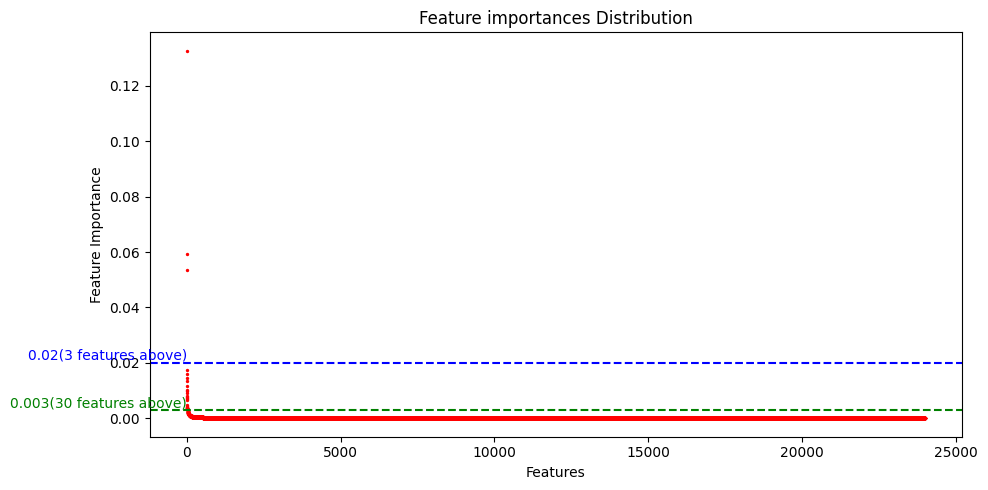

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances Distribution")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=2)
#plt.yscale("log")  # Set the y-axis to a logarithmic scale
plt.axhline(y=0.02, color='b', linestyle='--') # Add horizontal line at y=0.01
# Add label to the line
plt.text(1, 0.02, '0.02(3 features above)', va='bottom', ha='right', color='b') # Adjust the x value as needed



plt.axhline(y=0.003, color='g', linestyle='--') # Add horizontal line at y=0.01
# Add label to the line
plt.text(1, 0.003, '0.003(30 features above)', va='bottom', ha='right', color='g') # Adjust the x value as needed




plt.ylabel("Feature Importance")
plt.xlabel("Features")
plt.savefig("xgboost_feature_importance_cell.png")

plt.tight_layout()
plt.show()


In [ ]:


# Find the number of importances greater than 0.01
above_threshold_count = np.sum(importances > 0.003)

print(f"Number of features with importance greater than 0.01: {above_threshold_count}")


Number of features with importance greater than 0.01: 30


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import pandas as pd

xgboost_acc_list = []
num_high_list = []
num_feature_list = []
importance_series = pd.Series(importances, index=X.columns)

for i in [10000,5000,2000,1000,500,300,100,50,30,10,5]:
    print(i)
    top_features = importance_series.sort_values(ascending=False)[:i].index

    X = X_res[top_features]
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42)


    # XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
    xgboost_acc_list.append(accuracy_score(y_test, y_pred))
    class_labels = np.unique(np.concatenate((y_test, y_pred)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test, y_pred, target_names=class_labels_str)
    print(report)


10000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8753490227363383
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014

5000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8793378540087754
              precision    recall  f1-score   support

           0       0.92      0.84      0.88      2554
           1       0.85      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014

2000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8761467889908257
              precision    recall  f1-score   support

           0       0.91      0.84      0.87      2554
           1       0.84      0.92      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014

1000


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8697646589549262
              precision    recall  f1-score   support

           0       0.91      0.83      0.87      2554
           1       0.84      0.91      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014

500


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.868568009573195
              precision    recall  f1-score   support

           0       0.90      0.83      0.87      2554
           1       0.84      0.91      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014

300


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8691663342640606
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2554
           1       0.84      0.90      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014

100


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8677702433187077
              precision    recall  f1-score   support

           0       0.90      0.84      0.87      2554
           1       0.84      0.90      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014

50


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8641802951735141
              precision    recall  f1-score   support

           0       0.90      0.83      0.86      2554
           1       0.83      0.90      0.87      2460

    accuracy                           0.86      5014
   macro avg       0.87      0.86      0.86      5014
weighted avg       0.87      0.86      0.86      5014

30


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8651775029916234
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      2554
           1       0.83      0.91      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014

10


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8518149182289589
              precision    recall  f1-score   support

           0       0.91      0.79      0.84      2554
           1       0.81      0.92      0.86      2460

    accuracy                           0.85      5014
   macro avg       0.86      0.85      0.85      5014
weighted avg       0.86      0.85      0.85      5014

5


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.837455125648185
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      2554
           1       0.80      0.89      0.84      2460

    accuracy                           0.84      5014
   macro avg       0.84      0.84      0.84      5014
weighted avg       0.84      0.84      0.84      5014



In [ ]:
xgboost_acc_list

[0.8753490227363383,
 0.8793378540087754,
 0.8761467889908257,
 0.8697646589549262,
 0.868568009573195,
 0.8691663342640606,
 0.8677702433187077,
 0.8641802951735141,
 0.8651775029916234,
 0.8518149182289589,
 0.837455125648185,
 0.8236936577582769,
 0.8181092939768648,
 0.7861986437973674,
 0.7622656561627443]

In [ ]:

for i in [4,3,2,1]:
    print(i)
    top_features = importance_series.sort_values(ascending=False)[:i].index

    X = X_res[top_features]
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y_res, test_size=0.2, random_state=42)


    # XGBoost model
    model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('XGBoost Accuracy:', accuracy_score(y_test, y_pred))
    xgboost_acc_list.append(accuracy_score(y_test, y_pred))
    class_labels = np.unique(np.concatenate((y_test, y_pred)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test, y_pred, target_names=class_labels_str)
    print(report)

4


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8236936577582769
              precision    recall  f1-score   support

           0       0.86      0.78      0.82      2554
           1       0.79      0.87      0.83      2460

    accuracy                           0.82      5014
   macro avg       0.83      0.82      0.82      5014
weighted avg       0.83      0.82      0.82      5014

3


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.8181092939768648
              precision    recall  f1-score   support

           0       0.84      0.79      0.82      2554
           1       0.79      0.85      0.82      2460

    accuracy                           0.82      5014
   macro avg       0.82      0.82      0.82      5014
weighted avg       0.82      0.82      0.82      5014

2


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.7861986437973674
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      2554
           1       0.74      0.86      0.80      2460

    accuracy                           0.79      5014
   macro avg       0.79      0.79      0.79      5014
weighted avg       0.79      0.79      0.79      5014

1


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost Accuracy: 0.7622656561627443
              precision    recall  f1-score   support

           0       0.75      0.80      0.78      2554
           1       0.78      0.72      0.75      2460

    accuracy                           0.76      5014
   macro avg       0.76      0.76      0.76      5014
weighted avg       0.76      0.76      0.76      5014



In [23]:
num_features_selected = ['all features','10000','1000','500','300','100','50','30','10','5','4','3','2','1']

xgboost_acc_list_1 = [0.8765,
 0.8753490227363383,
 0.8697646589549262,
 0.868568009573195,
 0.8691663342640606,
 0.8677702433187077,
 0.8641802951735141,
 0.8651775029916234,
 0.8518149182289589,
 0.837455125648185,
 0.8236936577582769,
 0.8181092939768648,
 0.7861986437973674,
 0.7622656561627443]
rf_acc_list_1 = [0.87,
 0.8709445552453131,
 0.8699641005185481,
 0.8713601914639011,
 0.8733546071001197,
 0.8725568408456322,
 0.87016354208217,
 0.87016354208217,
 0.8508177104108496,
 0.8199042680494615,
 0.8047467092142002,
 0.7822098125249302,
 0.7742321499800559,
 0.7455125648185081]

svm_acc_list = [0.8987,
 0.899680893498205,
 0.831870761866773,
 0.7971679297965696,
 0.7798165137614679,
 0.7195851615476665,
 0.6535700039888312,
 0.637016354208217,
 0.60729956122856,
 0.58978564020741923,
 0.5107698444355804,
 0.5205424810530515,
 0.5203430394894296,
 0.525329078579976]

In [24]:
num_features_selected.reverse()
rf_acc_list_1.reverse()
xgboost_acc_list_1.reverse()
svm_acc_list.reverse()

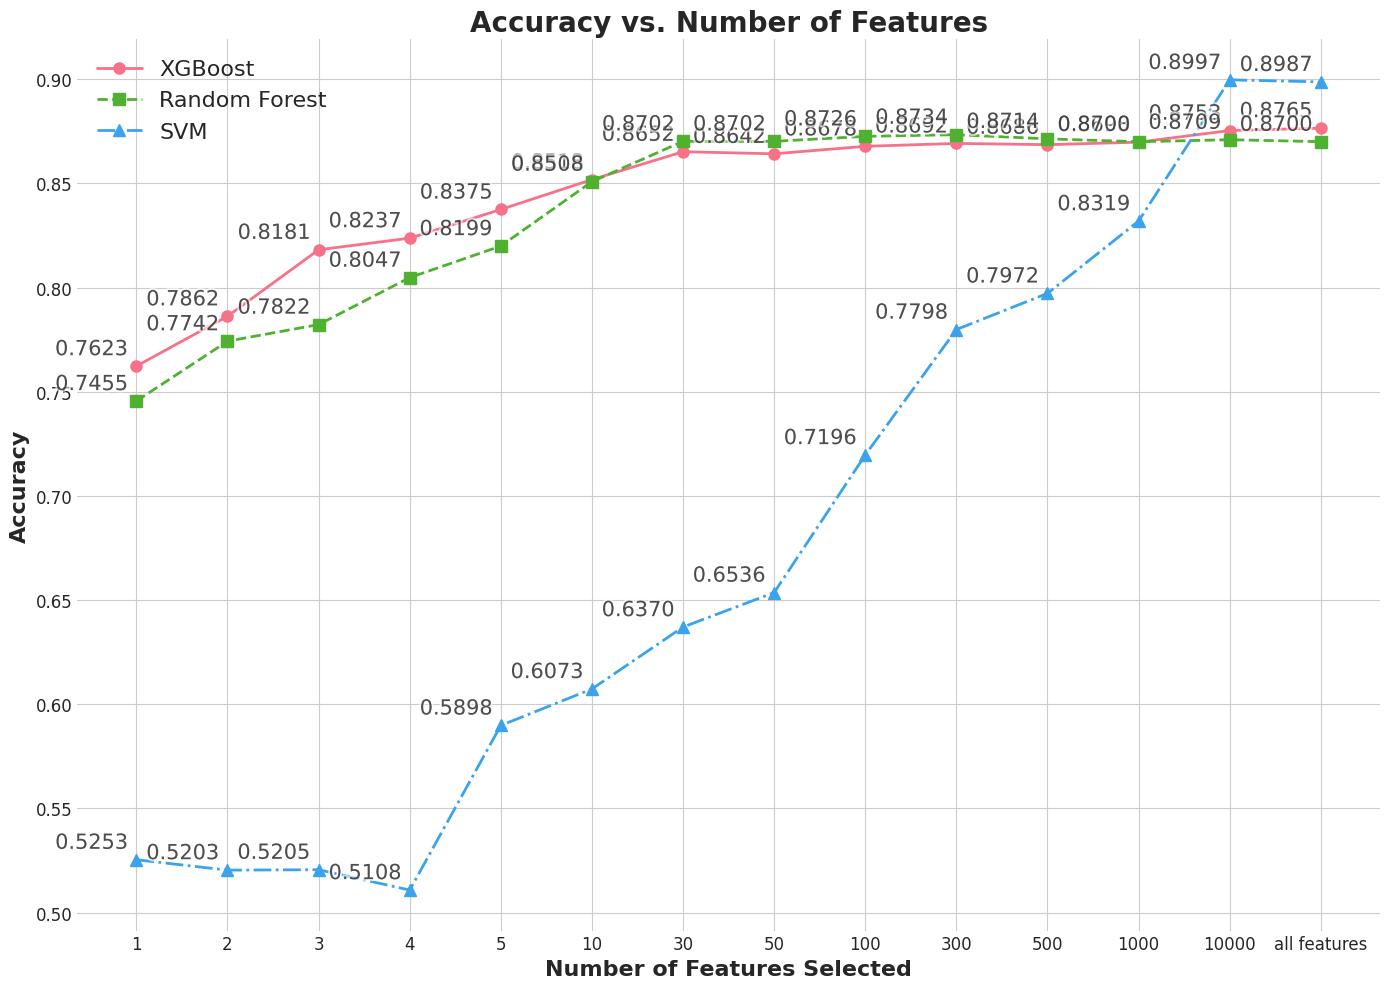

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("whitegrid")

# Create a color palette
palette = sns.color_palette("husl", 3)

# Initialize the figure
plt.figure(figsize=(14, 10))

# Plotting
plt.plot(num_features_selected, xgboost_acc_list_1, label='XGBoost', marker='o', linestyle='-', color=palette[0], markersize=8, linewidth=2)
plt.plot(num_features_selected, rf_acc_list_1, label='Random Forest', marker='s', linestyle='--', color=palette[1], markersize=8, linewidth=2)
plt.plot(num_features_selected, svm_acc_list, label='SVM', marker='^', linestyle='-.', color=palette[2], markersize=8, linewidth=2)

# Function for improved annotation
def annotate_points(x, y, txt_list, ha='right', va='bottom', offset=(-6, 5)):
    for i, txt in enumerate(txt_list):
        annotation = plt.annotate(f"{txt:.4f}", (x[i], y[i]), textcoords="offset points", xytext=offset, ha=ha, va=va, fontsize=15, color='black', alpha=0.6)
        annotation.set_path_effects([patheffects.withStroke(linewidth=3, foreground='white')])

annotate_points(num_features_selected, xgboost_acc_list_1, xgboost_acc_list_1)
annotate_points(num_features_selected, rf_acc_list_1, rf_acc_list_1)
annotate_points(num_features_selected, svm_acc_list, svm_acc_list)

# Enhancing x and y axis
plt.xlabel('Number of Features Selected', fontsize=16, fontweight='bold')
plt.ylabel('Accuracy', fontsize=16, fontweight='bold')
plt.title('Accuracy vs. Number of Features', fontsize=20, fontweight='bold')

# Adjusting ticks for clarity
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Enhancing the legend
plt.legend(fontsize=16, loc='best')

# Tight layout
plt.tight_layout()

# Saving the plot with better dpi
plt.savefig("compare_feature_cell_importance.png", dpi=300)

# Display the plot
plt.show()


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
# Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
class_labels = np.unique(np.concatenate((y_test, y_pred)))
class_labels_str = class_labels.astype(str)
report = classification_report(y_test, y_pred, target_names=class_labels_str)
print(report)


Random Forest Accuracy: 0.87016354208217
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      2554
           1       0.82      0.94      0.88      2460

    accuracy                           0.87      5014
   macro avg       0.88      0.87      0.87      5014
weighted avg       0.88      0.87      0.87      5014



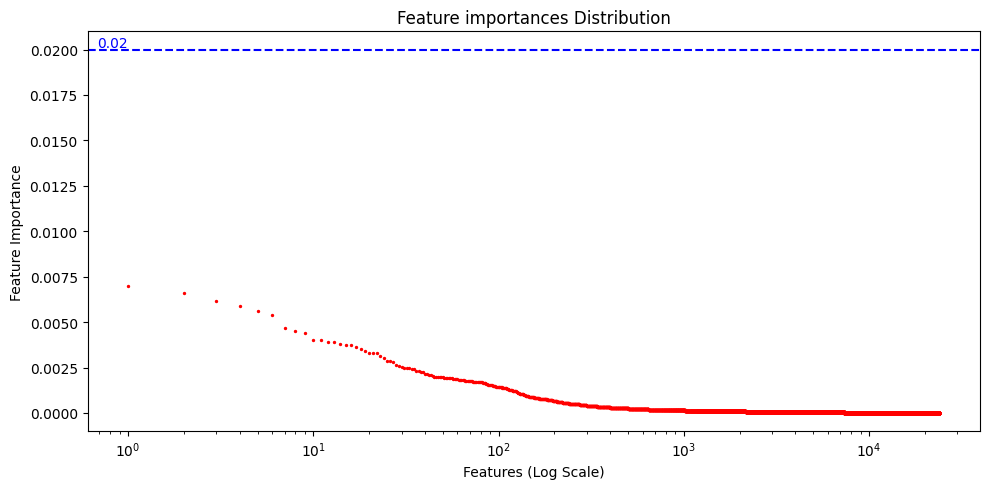

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 5))
plt.title("Feature importances Distribution")
plt.scatter(range(X_train.shape[1]), importances[indices], color='r', s=2)
plt.xscale("log")  # Set the y-axis to a logarithmic scale
plt.axhline(y=0.02, color='b', linestyle='--') # Add horizontal line at y=0.01
# Add label to the line
plt.text(1, 0.02, '0.02', va='bottom', ha='right', color='b') # Adjust the x value as needed

plt.ylabel("Feature Importance")
plt.xlabel("Features (Log Scale)")
plt.savefig("feature_importance_XGboost")

plt.tight_layout()
plt.show()


In [ ]:


# Find the number of importances greater than 0.01
above_threshold_count = np.sum(importances > 0.02)

print(f"Number of features with importance greater than 0.01: {above_threshold_count}")


Number of features with importance greater than 0.01: 3


In [ ]:
importances


array([1.92711050e-05, 0.00000000e+00, 8.75409696e-06, ...,
       0.00000000e+00, 1.97609454e-06, 3.30126356e-05])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import pandas as pd

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
import pandas as pd

rf_acc_list = []  # Changed to Random Forest accuracy list
num_high_list = []
num_feature_list = []
importance_series = pd.Series(importances, index=X_res.columns)

for i in [10000, 5000, 2000, 1000, 500, 300, 100, 50, 30, 10, 5,4,3,2,1]:
    print(i)
    top_features = importance_series.sort_values(ascending=False)[:i].index

    X_selected = X_res[top_features]
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)

    # Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
    rf_acc_list.append(accuracy_score(y_test, y_pred))
    class_labels = np.unique(np.concatenate((y_test, y_pred)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test, y_pred, target_names=class_labels_str)
    print(report)


10000
Random Forest Accuracy: 0.8769445552453131
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2554
           1       0.83      0.94      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014

5000
Random Forest Accuracy: 0.8677702433187077
              precision    recall  f1-score   support

           0       0.92      0.81      0.86      2554
           1       0.83      0.93      0.87      2460

    accuracy                           0.87      5014
   macro avg       0.87      0.87      0.87      5014
weighted avg       0.87      0.87      0.87      5014

2000
Random Forest Accuracy: 0.8677702433187077
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2554
           1       0.83      0.92      0.87      2460

    accuracy                         

In [ ]:
rf_acc_list

[0.8769445552453131,
 0.8677702433187077,
 0.8677702433187077,
 0.8699641005185481,
 0.8713601914639011,
 0.8733546071001197,
 0.8725568408456322,
 0.87016354208217,
 0.87016354208217,
 0.8508177104108496,
 0.8199042680494615,
 0.8047467092142002,
 0.7822098125249302,
 0.7742321499800559,
 0.7455125648185081]

In [ ]:

for i in [10000]:
    print(i)
    top_features = importance_series.sort_values(ascending=False)[:i].index

    X_selected = X_res[top_features]
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y_res, test_size=0.2, random_state=42)

    # Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Random Forest Accuracy:', accuracy_score(y_test, y_pred))
    class_labels = np.unique(np.concatenate((y_test, y_pred)))
    class_labels_str = class_labels.astype(str)
    report = classification_report(y_test, y_pred, target_names=class_labels_str)
    print(report)

10000
Random Forest Accuracy: 0.8769445552453131
              precision    recall  f1-score   support

           0       0.94      0.81      0.87      2554
           1       0.83      0.94      0.88      2460

    accuracy                           0.88      5014
   macro avg       0.88      0.88      0.88      5014
weighted avg       0.88      0.88      0.88      5014



# svm

In [ ]:
    X = df_final.drop(['reference', 'tumourID', 'CellType', 'is_Epithelial_cells'], axis=1)
    y = df_final['is_Epithelial_cells']

    # Initialize the ADASYN sampler
    adasyn = ADASYN(random_state=42)

    # Fit and resample the data
    X_res, y_res = adasyn.fit_resample(X, y)

    # Split the data into training and test sets

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)


In [ ]:
# Import necessary libraries
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


model = LinearSVC(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Linear SVM Accuracy:', accuracy_score(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Linear SVM Accuracy: 0.8990825688073395


In [ ]:
# Now get the unique class labels
class_labels = np.unique(y).astype(str)  # Convert to strings if they are not

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=class_labels)
print(report)


              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2554
           1       0.97      0.82      0.89      2460

    accuracy                           0.90      5014
   macro avg       0.91      0.90      0.90      5014
weighted avg       0.91      0.90      0.90      5014



[[2499   55]
 [ 452 2008]]


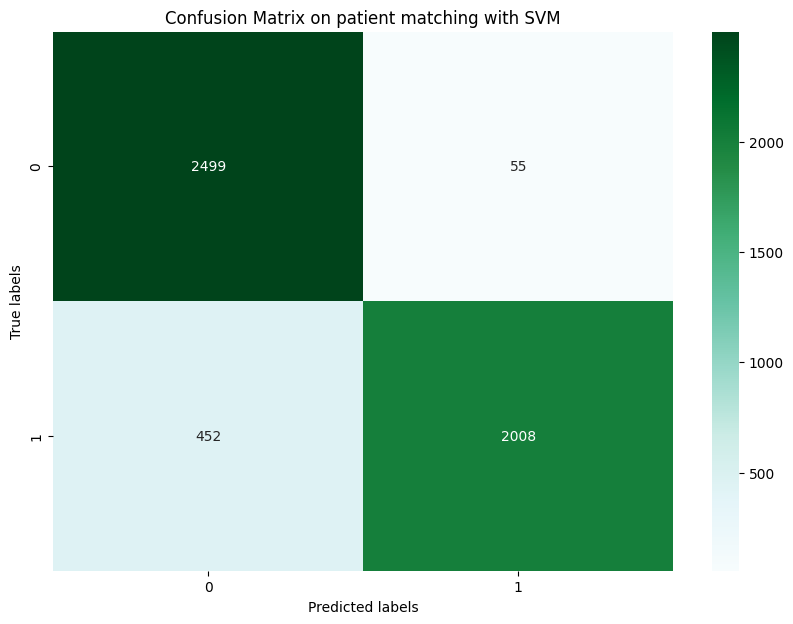

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='BuGn')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix on patient matching with SVM')
plt.savefig("smv_pm.png")
plt.show()


In [ ]:
from sklearn.svm import SVC

# Assume you have your data X_train, y_train loaded
# and a list feature_names with the names of your features

feature_names = X_train.columns.tolist()
# 2. Rank features based on absolute weights
feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# 3. Map numerical indices to actual feature names
ranked_feature_names = [feature_names[i] for i in ranked_features_indices]

# 4. Select top 100 feature names
top_100_feature_names = ranked_feature_names[:100]

print("Top 100 features:", top_100_feature_names)
# Filter your training data using these indices
X_train_top_100 = X_train[top_100_feature_names]

# Do the same for the test set or any other dataset you want to filter
X_test_top_100 = X_test[top_100_feature_names]
# Using only the top 100 features to train a new SVM model

svm_model_top_100 = LinearSVC(max_iter=10000)
svm_model_top_100.fit(X_train_top_100, y_train)

# If you have a test set:
# Evaluate its performance
accuracy_top_100 = svm_model_top_100.score(X_test_top_100, y_test)
print(f"Accuracy with top 100 features: {accuracy_top_100:.5f}")


Top 100 features: ['PURB', 'ABCF3', 'RP11-983P16.4', 'BMS1', 'GDF11', 'UNC119', 'C1GALT1', 'ATPAF2', 'SLC15A4', 'NAV1', 'GTF2F1', 'EXOC6B', 'EIF2A', 'PARVB', 'MAPK13', 'MIIP', 'GNPNAT1', 'DHCR7', 'C12orf49', 'ARHGEF37', 'RPE', 'TRMT2A', 'UBA2', 'KLF16', 'SCAF11', 'POLR3A', 'TIMM17B', 'API5', 'FAM175B', 'SNX29', 'YTHDC2', 'PTCD3', 'LENG8', 'RPUSD1', 'RNF166', 'MSRA', 'TAB3', 'NPIPB15', 'BMPR1B-AS1', 'TIMM50', 'SLC52A2', 'SVIL', 'TMTC4', 'PES1', 'CREBRF', 'TAP1', 'LINC01207', 'KAT7', 'INTS12', 'FAT1', 'UTP4', 'CCDC84', 'NCEH1', 'HOMEZ', 'BCL2L12', 'PON2', 'TTTY15', 'SGSM3', 'RHBDD3', 'CDK5', 'SRD5A3', 'HACL1', 'POLR3GL', 'TCF25', 'TMEM39A', 'PELI1', 'DFNB31', 'PARN', 'DAAM1', 'TNPO3', 'CLEC14A', 'RING1', 'C16orf52', 'MARVELD3', 'BMI1', 'ECI1', 'COX7A1', 'ZNF562', 'PTGES', 'STEAP2', 'ATF7IP', 'SPAG16', 'CXADR', 'RPL11', 'VPS37C', 'SLC25A45', 'BAK1', 'MRPL53', 'TNFRSF21', 'TRPV6', 'PNO1', 'DNAJC9', 'ANXA4', 'YDJC', 'C14orf142', 'LRRC1', 'SELENBP1', 'SIRT5', 'FAM213A', 'HNRNPA1L2']
Accuracy

In [ ]:
from sklearn.svm import LinearSVC

# List of numbers of top features to test
top_features_list = [10000, 1000, 500, 300, 100, 50, 30, 10, 5,4,3,2,1]
svm_acc_list = []
str_svm_acc_list = []
# Assume you have your data X_train, y_train loaded
# and a list feature_names with the names of your features
feature_names = X_train.columns.tolist()

# Rank features based on absolute weights
feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# Map numerical indices to actual feature names
ranked_feature_names = [feature_names[i] for i in ranked_features_indices]

# Loop through the different numbers of top features and evaluate the model
for top_features in top_features_list:
    # Select the top feature names
    top_feature_names = ranked_feature_names[:top_features]

    # Filter your training and test data using these indices
    X_train_top = X_train[top_feature_names]
    X_test_top = X_test[top_feature_names]

    # Using only the top features to train a new SVM model
    svm_model_top = LinearSVC(max_iter=1000)
    svm_model_top.fit(X_train_top, y_train)

    # Evaluate its performance
    accuracy_top = svm_model_top.score(X_test_top, y_test)
    print(f"Accuracy with top {top_features} features: {accuracy_top:.5f}")
    svm_acc_list.append(accuracy_top)
    str_svm_acc_list.append(str(accuracy_top))

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy with top 10000 features: 0.89968


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy with top 1000 features: 0.83187


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy with top 500 features: 0.79717


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy with top 300 features: 0.77982


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Accuracy with top 100 features: 0.71959
Accuracy with top 50 features: 0.65357
Accuracy with top 30 features: 0.63702
Accuracy with top 10 features: 0.60730
Accuracy with top 5 features: 0.47986
Accuracy with top 4 features: 0.51077
Accuracy with top 3 features: 0.52054
Accuracy with top 2 features: 0.52034
Accuracy with top 1 features: 0.52533


In [ ]:
svm_acc_list

[0.899680893498205,
 0.831870761866773,
 0.7971679297965696,
 0.7798165137614679,
 0.7195851615476665,
 0.6535700039888312,
 0.637016354208217,
 0.60729956122856,
 0.4798564020741923,
 0.5107698444355804,
 0.5205424810530515,
 0.5203430394894296,
 0.525329078579976]

In [ ]:
from sklearn.svm import LinearSVC

# List of numbers of top features to test
top_features_list = [6,5,4,3,2,1]
svm_acc_list = []
str_svm_acc_list = []
# Assume you have your data X_train, y_train loaded
# and a list feature_names with the names of your features
feature_names = X_train.columns.tolist()

# Rank features based on absolute weights
feature_weights = model.coef_[0]
ranked_features_indices = sorted(range(len(feature_weights)), key=lambda i: abs(feature_weights[i]), reverse=True)

# Map numerical indices to actual feature names
ranked_feature_names = [feature_names[i] for i in ranked_features_indices]

# Loop through the different numbers of top features and evaluate the model
for top_features in top_features_list:
    # Select the top feature names
    top_feature_names = ranked_feature_names[:top_features]

    # Filter your training and test data using these indices
    X_train_top = X_train[top_feature_names]
    X_test_top = X_test[top_feature_names]

    # Using only the top features to train a new SVM model
    svm_model_top = LinearSVC(max_iter=5000)
    svm_model_top.fit(X_train_top, y_train)

    # Evaluate its performance
    accuracy_top = svm_model_top.score(X_test_top, y_test)
    print(f"Accuracy with top {top_features} features: {accuracy_top:.5f}")


Accuracy with top 6 features: 0.58975
Accuracy with top 5 features: 0.47986
Accuracy with top 4 features: 0.51077
Accuracy with top 3 features: 0.52054
Accuracy with top 2 features: 0.52034
Accuracy with top 1 features: 0.52533
